In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit#, fsolve
from sklearn.metrics import r2_score

[Citation for SciPy](https://scipy.org/citing-scipy/)

Pauli Virtanen, Ralf Gommers, Travis E. Oliphant, Matt Haberland, Tyler Reddy, David Cournapeau, Evgeni Burovski, Pearu Peterson, Warren Weckesser, Jonathan Bright, Stéfan J. van der Walt, Matthew Brett, Joshua Wilson, K. Jarrod Millman, Nikolay Mayorov, Andrew R. J. Nelson, Eric Jones, Robert Kern, Eric Larson, CJ Carey, İlhan Polat, Yu Feng, Eric W. Moore, Jake VanderPlas, Denis Laxalde, Josef Perktold, Robert Cimrman, Ian Henriksen, E.A. Quintero, Charles R Harris, Anne M. Archibald, Antônio H. Ribeiro, Fabian Pedregosa, Paul van Mulbregt, and SciPy 1.0 Contributors. (2020) SciPy 1.0: **Fundamental Algorithms for Scientific Computing in Python.** *Nature Methods*, 17(3), 261-272. DOI: 10.1038/s41592-019-0686-2.



## Create the percentage reference ranges

In [2]:
vwf_ref_prec = []
perc = 100
i = 6
while i >= 0 :
    vwf_ref_prec.append(perc)
    perc = perc / 2
    i-=1
    
vwf_ref_prec.append(0)
vwf_ref_prec

[100, 50.0, 25.0, 12.5, 6.25, 3.125, 1.5625, 0]

## Read int he plate

In [4]:
plate = pd.read_excel(
    "VWF AG & CB 27 March 2025.xlsx", skiprows=3, index_col=0, 
    nrows=8, usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12]
)
plate

,1,2,3,4,5,6,7,8,9,10,11,12
A,0.621,0.562,0.391,0.387,0.389,0.376,0.484,0.485,0.331,0.328,0.471,0.490
B,0.516,0.489,0.264,0.257,0.257,0.271,0.385,0.377,0.220,0.227,0.360,0.385
C,0.374,0.337,0.339,0.336,0.412,0.425,0.319,0.303,0.301,0.323,0.363,0.366
D,0.247,0.243,0.212,0.209,0.296,0.289,0.179,0.183,0.215,0.211,0.265,0.260
E,0.152,0.145,0.347,0.341,0.473,0.460,0.268,0.253,0.258,0.269,0.185,0.192
F,0.083,0.083,0.240,0.238,0.347,0.343,0.159,0.163,0.163,0.157,0.111,0.103
G,0.044,0.045,0.410,0.402,0.204,0.199,0.250,0.257,0.416,0.421,0.003,0.004
H,0.003,0.002,0.302,0.287,0.116,0.124,0.150,0.141,0.323,0.335,0.005,0.005


### Create a dataframe/matrix with the dilution factors

In [5]:
dil_df1 = pd.DataFrame.from_dict({
    1: [1,1,1,1,1,1,1,1],
    2: [1,1,1,1,1,1,1,1],
    3: [5,5,5,5,5,5,5,5],
    4: [10,10,10,10,10,10,10,10],
    5: [5,5,5,5,5,5,5,5],
    6: [10,10,10,10,10,10,10,10],
    7: [5,5,5,5,5,5,5,5],
    8: [10,10,10,10,10,10,10,10],
    9: [5,5,5,5,5,5,5,5],
    10: [10,10,10,10,10,10,10,10],
    11: [5,5,5,5,5,5,5,5],
    12: [10,10,10,10,10,10,10,10],
})
dil_df1.set_index([['A','B', 'C', 'D', 'E', 'F', 'G', 'H']], inplace=True)
dil_df1

,1,2,3,4,5,6,7,8,9,10,11,12
A,1,1,5,10,5,10,5,10,5,10,5,10
B,1,1,5,10,5,10,5,10,5,10,5,10
C,1,1,5,10,5,10,5,10,5,10,5,10
D,1,1,5,10,5,10,5,10,5,10,5,10
E,1,1,5,10,5,10,5,10,5,10,5,10
F,1,1,5,10,5,10,5,10,5,10,5,10
G,1,1,5,10,5,10,5,10,5,10,5,10
H,1,1,5,10,5,10,5,10,5,10,5,10


In [6]:
dil_df2 = pd.DataFrame.from_dict({
    1: [1,1,1,1,1,1,1,1],
    2: [1,1,1,1,1,1,1,1],
    3: [5,10,5,10,5,10,5,10],
    4: [5,10,5,10,5,10,5,10],
    5: [5,10,5,10,5,10,5,10],
    6: [5,10,5,10,5,10,5,10],
    7: [5,10,5,10,5,10,5,10],
    8: [5,10,5,10,5,10,5,10],
    9: [5,10,5,10,5,10,5,10],
    10: [5,10,5,10,5,10,5,10],
    11: [5,10,5,10,5,10,5,10],
    12: [5,10,5,10,5,10,5,10],
})
dil_df2.set_index([['A','B', 'C', 'D', 'E', 'F', 'G', 'H']], inplace=True)
dil_df2

,1,2,3,4,5,6,7,8,9,10,11,12
A,1,1,5,5,5,5,5,5,5,5,5,5
B,1,1,10,10,10,10,10,10,10,10,10,10
C,1,1,5,5,5,5,5,5,5,5,5,5
D,1,1,10,10,10,10,10,10,10,10,10,10
E,1,1,5,5,5,5,5,5,5,5,5,5
F,1,1,10,10,10,10,10,10,10,10,10,10
G,1,1,5,5,5,5,5,5,5,5,5,5
H,1,1,10,10,10,10,10,10,10,10,10,10


*I am not 100% sure about the dilution layout, this second version makes more sense if I look at the data*

## Extract the callibrators and data

In [7]:
calibrators = plate[[1,2]].mean(axis=1).values
calibrators

array([0.5915, 0.5025, 0.3555, 0.245 , 0.1485, 0.083 , 0.0445, 0.0025])

In [8]:
vwf_ref_prec

[100, 50.0, 25.0, 12.5, 6.25, 3.125, 1.5625, 0]

## Curve fitting

[equation used in GraphPad Prism](https://www.graphpad.com/guides/prism/latest/curve-fitting/reg_one_site_total.htm)

$$Y = \frac{B_{max} * X}{K_d + X} + NS*X + Bacground$$

In [9]:
def one_site_total_binding(x, bmax, kd, ns, background):
    return (bmax * x / (kd + x)) + (ns * x) + background

p0 = [100, 10, 0.5, 0] # this may need work for the inititial predictions

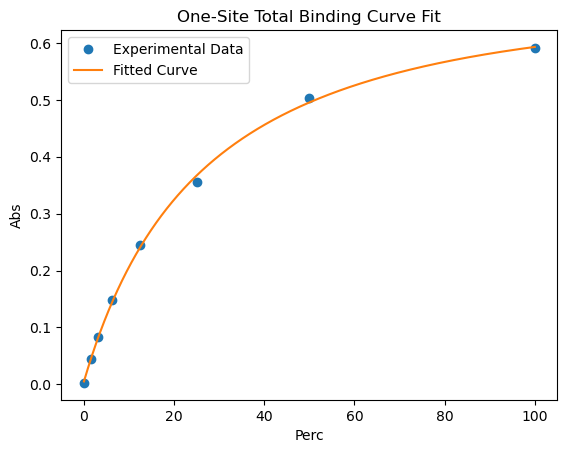

In [10]:
# Perform the curve fit
popt, pcov = curve_fit(one_site_total_binding, vwf_ref_prec, calibrators, p0=p0)

# Extract the fitted parameters
bmax_fit, kd_fit, ns_fit, background_fit = popt

# Generate the fitted curve
x_fit = np.linspace(min(vwf_ref_prec), max(vwf_ref_prec), 100000)
y_fit = one_site_total_binding(x_fit, bmax_fit, kd_fit, ns_fit, background_fit)

# Plot the data and the fitted curve
plt.plot(vwf_ref_prec, calibrators, 'o', label='Experimental Data')
plt.plot(x_fit, y_fit, '-', label='Fitted Curve')
plt.xlabel('Perc')
plt.ylabel('Abs')
plt.title('One-Site Total Binding Curve Fit')
plt.legend()
plt.show()

In [11]:
# Print the fitted parameters
print(f"Bmax: {bmax_fit:.2f}")
print(f"Kd: {kd_fit:.2f}")
print(f"NS: {ns_fit:.2f}")
print(f"Background: {background_fit:.2f}")

Bmax: 0.81
Kd: 29.43
NS: -0.00
Background: 0.01


---

## Four Parameter Logistig equation (4PL)

$$
y = d + \frac{a - d}{1 + \left(\frac{x}{c}\right)^b}
$$

[Source](https://www.myassays.com/four-parameter-logistic-regression.html)

Of course x = the independent variable and y = the dependent variable just as in the linear model above. The 4 estimated parameters consist of the following:

* a = the minimum value that can be obtained (i.e. what happens at 0 dose)

* d = the maximum value that can be obtained (i.e. what happens at infinite dose)

* c = the point of inflection (i.e. the point on the S shaped curve halfway between a and d)

* b = Hill’s slope of the curve (i.e. this is related to the steepness of the curve at point c).

The `d` paramater here is key. Remember the Hill equation for cooperativity, hemaglobin and how cool that mechanism is.

This equation rearanges easily also, since the `x` only appears once, unlike the one-site binding.


$$
x = c\bigg(\frac{a-d}{y-d} - 1\bigg)^\frac{1}{b}
$$

[Online 4PL calculator](https://www.aatbio.com/tools/four-parameter-logistic-4pl-curve-regression-online-calculator)

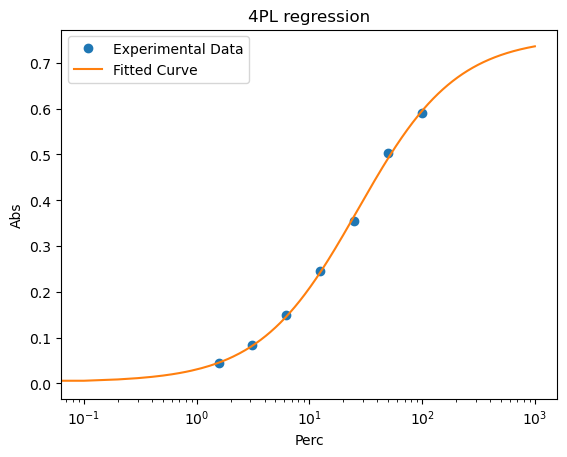

Parameters:
a: 0.003
b: 0.9923
c: 26.9243
d: 0.7564


In [12]:
def logistic_4_param(x, a, b, c, d):
    return d + ( (a - d) / (1 + (x / c)**b) )

p0 = [0, 1, 25, 1] # this may need work for the inititial predictions

# Perform the curve fit
popt, pcov = curve_fit(logistic_4_param, vwf_ref_prec, calibrators, p0=p0)

# Extract the fitted parameters
a_fit, b_fit, c_fit, d_fit = popt
# Generate the fitted curve
x_fit = np.linspace(min(vwf_ref_prec), max(vwf_ref_prec)*10, 10000)
y_fit = logistic_4_param(x_fit, a_fit, b_fit, c_fit, d_fit)

# Plot the data and the fitted curve
plt.plot(vwf_ref_prec, calibrators, 'o', label='Experimental Data')
plt.plot(x_fit, y_fit, '-', label='Fitted Curve')
plt.xlabel('Perc')
plt.ylabel('Abs')
plt.xscale('log')
plt.title("4PL regression")
plt.legend()
plt.show()
print("Parameters:")
print("a:", np.round(a_fit, 4))
print("b:", np.round(b_fit, 4))
print("c:", np.round(c_fit, 4))
print("d:", np.round(d_fit, 4))

*$R^2$ value based on the mean of the calibrator duplicates*

In [13]:
r2_score(calibrators, logistic_4_param(vwf_ref_prec, a_fit, b_fit, c_fit, d_fit ))

0.9992646682039013

### Rearange the equation

We rearange the equation so that we can get the %WVF based on the absorbance


$$
x = c\bigg(\frac{a-d}{y-d} - 1\bigg)^\frac{1}{b}
$$

* $x$ is the %VWF
* $y$ is the absorbance

In [14]:
def compute_4PL(y, a, b, c, d):
    """
    x = c * ((a - d) / (y - d) - 1) ** (1 / b)
    """
    if y == d:
        raise ValueError("Division by zero: y must not be equal to d.")
    inner = (a - d) / (y - d) - 1
    if inner < 0 and b % 2 == 0:
        raise ValueError("Cannot compute even root of a negative number.")
    x = c * (inner) ** (1 / b)
    return x

In [15]:
vwf_ref_prec

[100, 50.0, 25.0, 12.5, 6.25, 3.125, 1.5625, 0]

In [16]:
vwf_predict = []
for n in range(len(calibrators)):
    y = calibrators[n]
    x_pred = compute_4PL(y, a_fit, b_fit, c_fit, d_fit)
    vwf_predict.append(x_pred)
    print(y)
    print(vwf_ref_prec[n], x_pred)
    print("--------------------------------------")

0.5915
100 97.03181535030934
--------------------------------------
0.5025
50.0 53.24249296908745
--------------------------------------
0.35550000000000004
25.0 23.64803483782274
--------------------------------------
0.245
12.5 12.665708529494989
--------------------------------------
0.1485
6.25 6.372042639762181
--------------------------------------
0.083
3.125 3.1450727860839165
--------------------------------------
0.0445
1.5625 1.5341925405681252
--------------------------------------
0.0025
0 nan
--------------------------------------


/tmp/ipykernel_242192/3563498125.py:10: RuntimeWarning: invalid value encountered in scalar power
  x = c * (inner) ** (1 / b)


*needs more debugging*

We could assume that when such a Warning occurs, the input value is to small and we can return zero

[Possible sollutions](https://www.geeksforgeeks.org/how-to-fix-runtimewarning-invalid-value-encountered-in-double_scalars/)

**Below our $R^2$ score when we are predicting VWF%**

We exclude the last value where we have a true 0 and a predicted NaN

In [17]:
r2_score(vwf_ref_prec[0:7], vwf_predict[0:7])

0.9972499313712369

## Apply the function to compute the VWF%

In [18]:
vwf_plate = plate.map(lambda x: compute_4PL(x, a_fit, b_fit, c_fit, d_fit))
vwf_plate = vwf_plate.fillna(0)
vwf_plate

/tmp/ipykernel_242192/3563498125.py:10: RuntimeWarning: invalid value encountered in scalar power
  x = c * (inner) ** (1 / b)


,1,2,3,4,5,6,7,8,9,10,11,12
A,124.332620,78.050865,28.600382,27.994409,28.295734,26.394185,47.748518,48.026228,20.715940,20.380151,44.316419,49.446247
B,57.788580,49.157970,14.199801,13.620871,13.620871,14.795617,27.696355,26.535797,10.814662,11.315109,24.226323,27.696355
C,26.113202,21.402061,21.635189,21.286335,32.014453,34.346382,19.400663,17.756230,17.558876,19.830923,24.619258,25.018282
D,12.821741,12.510907,10.258689,10.054447,17.073068,16.410569,8.130410,8.375138,10.465227,10.190355,14.283867,13.866962
E,6.564643,6.181691,22.590681,21.870583,44.823815,41.648884,14.538153,13.297364,13.702568,14.623619,8.498807,8.938664
F,3.145073,3.145073,12.280980,12.129191,22.590681,22.108273,6.956748,7.185040,7.185040,6.843766,4.442285,4.059961
G,1.514479,1.553936,31.671337,30.337876,9.719041,9.389740,13.058127,13.620871,32.712866,33.609476,0.000000,0.032812
H,0.000000,0.000000,17.657334,16.224949,4.686221,5.084749,6.454308,5.966851,19.830923,21.171164,0.067262,0.067262


## Apply the dilution factors

In [19]:
vwf_plate_w_dil = vwf_plate * dil_df2
vwf_plate_w_dil

,1,2,3,4,5,6,7,8,9,10,11,12
A,124.332620,78.050865,143.001908,139.972046,141.478668,131.970927,238.742588,240.131142,103.579702,101.900754,221.582094,247.231237
B,57.788580,49.157970,141.998010,136.208711,136.208711,147.956174,276.963546,265.357965,108.146617,113.151090,242.263226,276.963546
C,26.113202,21.402061,108.175947,106.431676,160.072264,171.731908,97.003317,88.781148,87.794382,99.154616,123.096291,125.091410
D,12.821741,12.510907,102.586894,100.544467,170.730678,164.105689,81.304102,83.751378,104.652273,101.903554,142.838669,138.669620
E,6.564643,6.181691,112.953405,109.352913,224.119073,208.244422,72.690766,66.486822,68.512842,73.118093,42.494037,44.693318
F,3.145073,3.145073,122.809796,121.291913,225.906810,221.082730,69.567480,71.850398,71.850398,68.437658,44.422848,40.599613
G,1.514479,1.553936,158.356687,151.689378,48.595207,46.948698,65.290635,68.104355,163.564331,168.047381,0.000000,0.164062
H,0.000000,0.000000,176.573337,162.249491,46.862209,50.847490,64.543082,59.668510,198.309233,211.711639,0.672618,0.672618


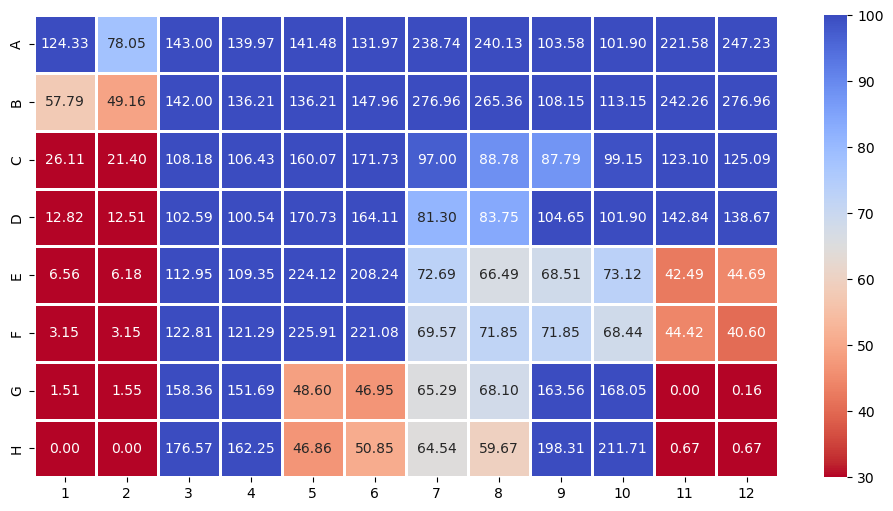

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(vwf_plate_w_dil, annot=True, linecolor='white', 
            linewidths=1, fmt=".2f", cmap='coolwarm_r', vmax=100, vmin=30)
plt.show()